### Práctica de Web Scraping

Se va a considerar una página web de wikipedia donde se encuentra un recopilatorio de las pinturas realizadas por Velázquez: https://es.wikipedia.org/wiki/Anexo:Cuadros_de_Vel%C3%A1zquez

En la página aparecen varios apartados, de los cuales se va a procesar aquel denominado "Obras total o parcialmente de Velázquez". En este apartado aparecen un conjunto de tablas clasificadas por diferentes etapas artísticas del pintor. En cada tabla aparecen pinturas junto a información asociada a cada una de ellas.

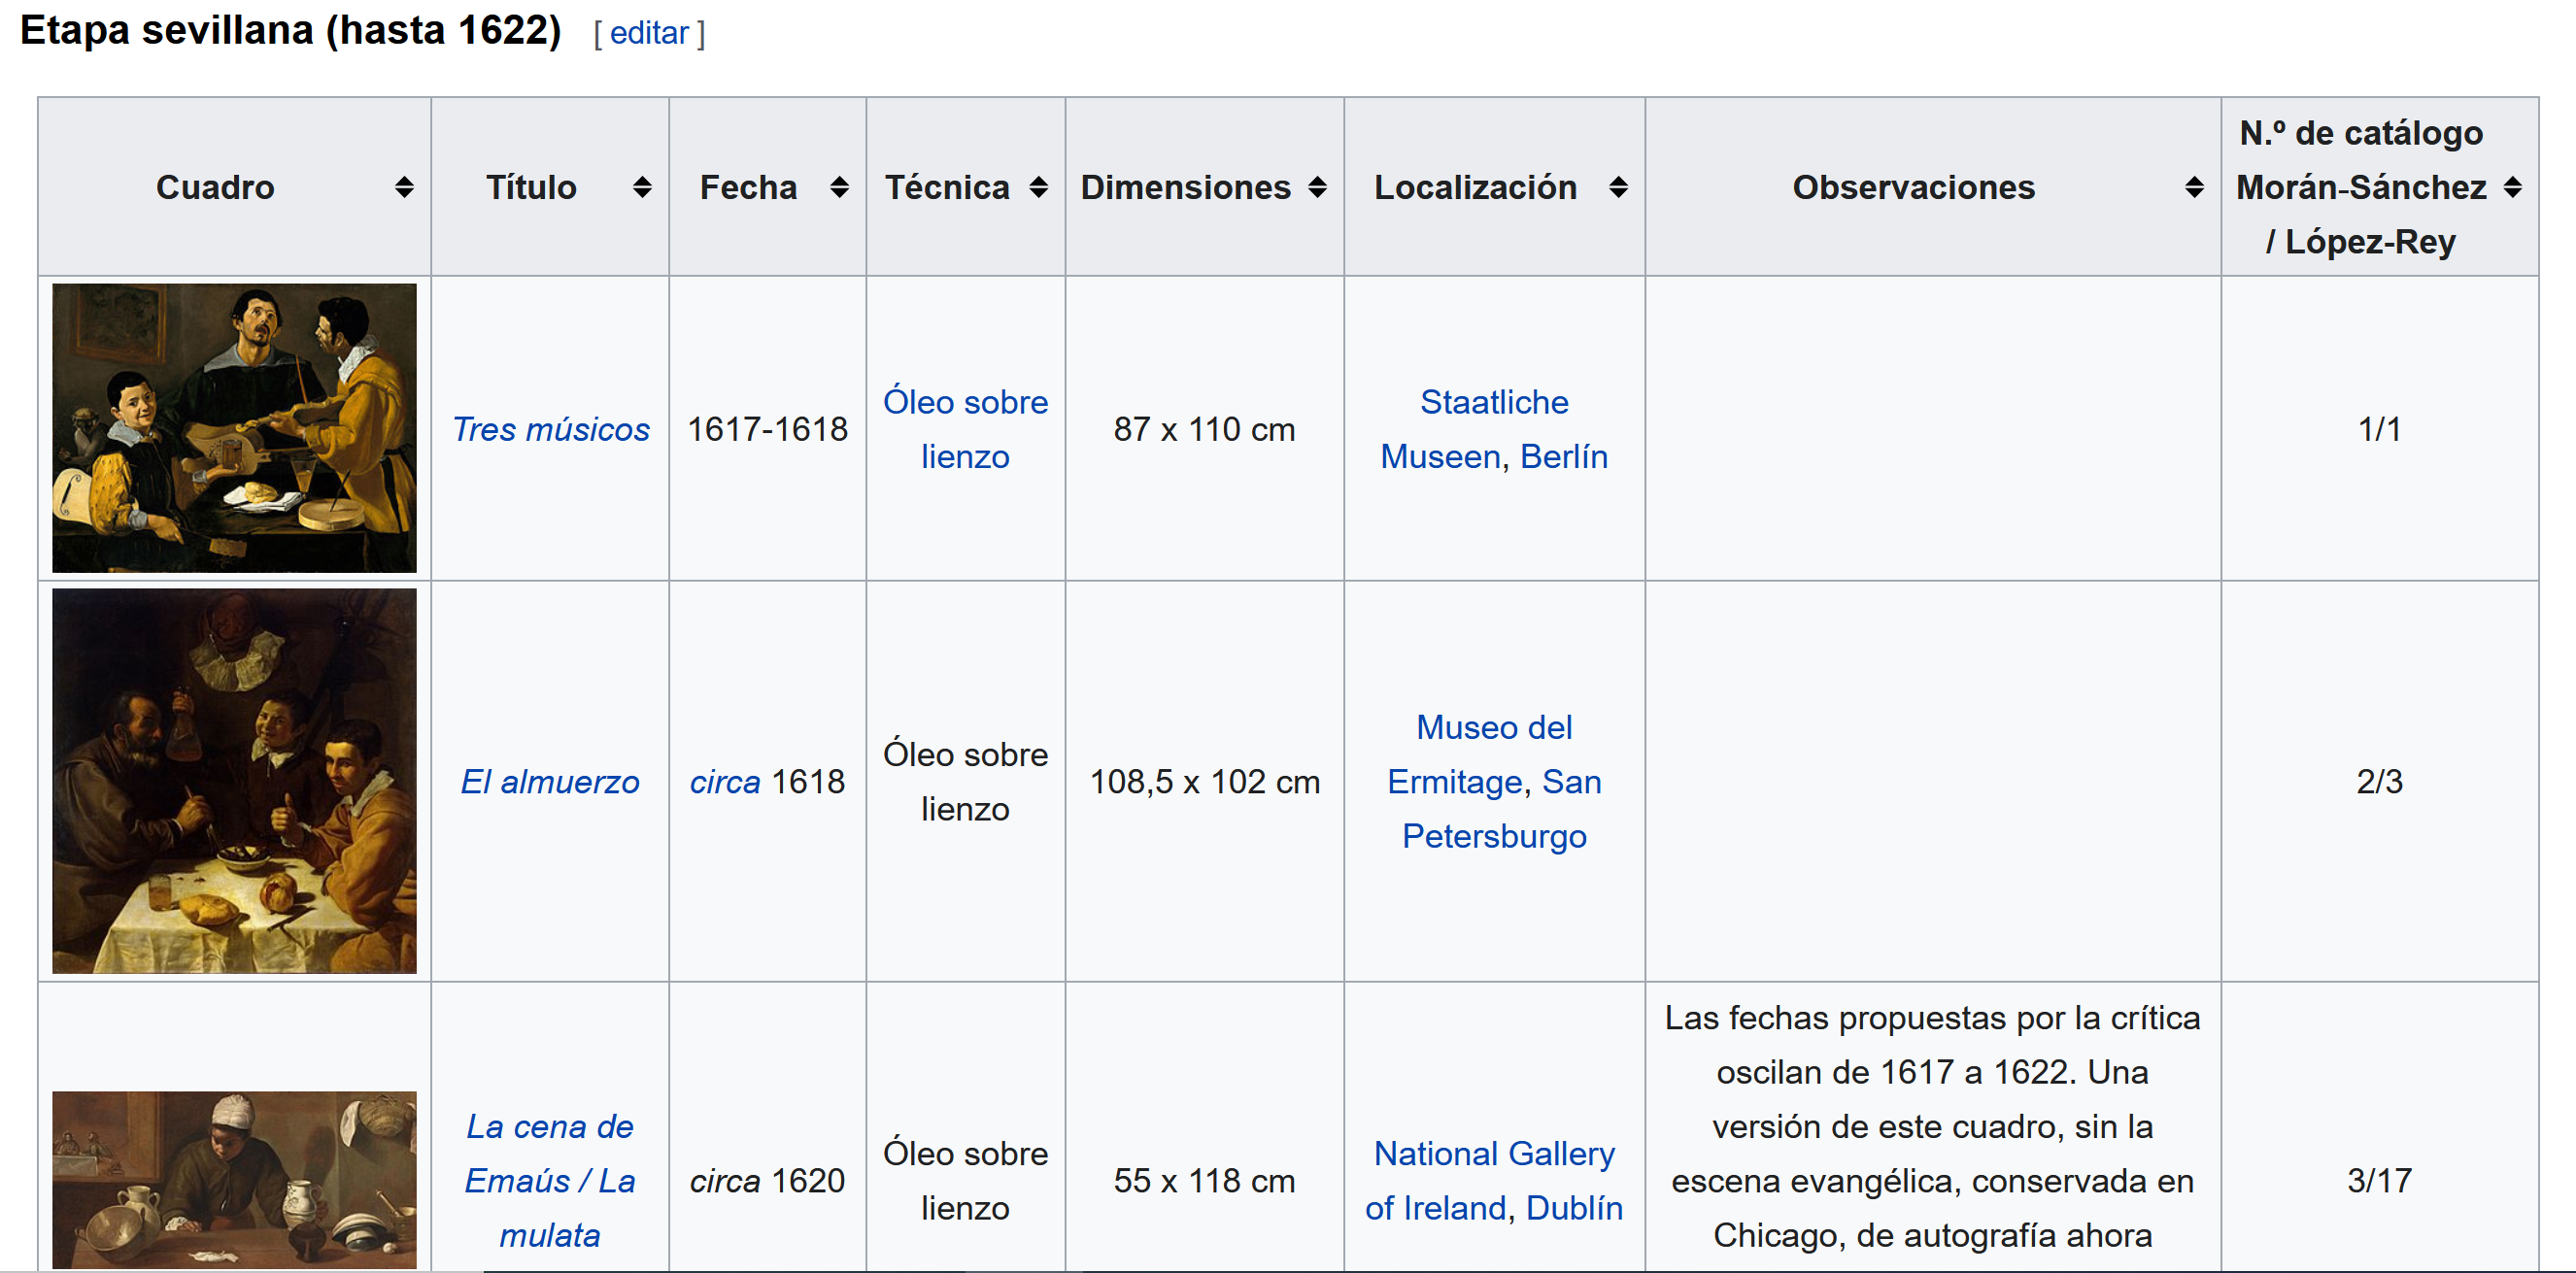

In [1]:
from IPython.display import Image
Image(filename='Captura.png')

La tabla está formada por 6 columnas: Cuadro, Título, Fecha, Técnica, Localización, Observaciones y Número de catálogo.

Observa cómo es la estructura de una fila.

Los enlaces a las imágenes se encuentran en el atributo src del elemento __"</img/>"__.En el ejemplo anterior, el valor de src es:

__//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Diego_Vel%C3%A1zquez_-_The_Three_Musicians_-_Google_Art_Project.jpg/150px-Diego_Vel%C3%A1zquez_-_The_Three_Musicians_-_Google_Art_Project.jpg__

Para acceder a la imagen se debe añadir https: delante del valor recuperado:

https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Diego_Vel%C3%A1zquez_-_The_Three_Musicians_-_Google_Art_Project.jpg/150px-Diego_Vel%C3%A1zquez_-_The_Three_Musicians_-_Google_Art_Project.jpg

Otra  característica que hay que tener en cuenta es que existe una tabla por cada uno de las etapas artísticas del pintor, con la siguiente estructura:

3 Obras total o parcialmente de Velázquez

    3.1 Etapa sevillana (hasta 1622
    
    3.2 Madrid (1622-1629)
    
    3.3 Primer viaje a Italia (1629-1630)
    
    3.4 Madrid (1631-1648)
    
    3.5 Segundo viaje a Italia (1649-1651)
    
    3.6 Madrid (1651-1660)
    
4 Autoría debatida e incorporaciones al catálogo

5 Dibujos

6 Taller, obras perdidas y antiguas atribuciones

Los títulos referidos a 3,4,5 y 6 aparecen en la página html en una etiqueta __"</h2/>"__, y los títulos referidos a 3.1, 3.2, 3.3, 3.4, 3.5 y 3.6 aparecen en una etiqueta __"</h3/>"__. Además pueden encontrarse también listados al principio de la página html 

Para recuperar el contenido de la página html de wikipedia, se puede hacer de la siguiente manera:

In [2]:
import requests
url="https://es.wikipedia.org/wiki/Anexo:Cuadros_de_Vel%C3%A1zquez"
r = requests.get(url)
html = r.text
print(html)

<!DOCTYPE html>
<html class="client-nojs" lang="es" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Anexo:Cuadros de Velázquez - Wikipedia, la enciclopedia libre</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\t."," \t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"],"wgRequestId":"be10f279-10c3-422c-8f58-ea6805fc08ed","wgCSPNonce":!1,"wgCanonicalNamespace":"Anexo","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":104,"wgPageName":"Anexo:Cuadros_de_Velázquez","wgTitle":"Cuadros de Velázquez","wgCurRevisionId":130188024,"wgRevisionId":130188024,"wgArticleId":4459494,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia:Páginas con enlaces mágicos de ISBN","Wikipedia:Páginas con ISBN incorrectos","Cuadro

Se pide hacer un buscador que permita recuperar información de la página. Para ello se le mostrará al usuario tres opciones entre las que tiene que elegir: Buscar por etapa pictórica, Buscar por técnica o Buscar por museo.

__Buscar por etapa pictórica[2,5 puntos]__
 
Si elige esta opción se le mostrará un listado de todas las etapas que aparecen en wikipedia antes mencionadas. Para facilitar la selección se asignará un número a cada etapa, de manera que el usuario elija por número.Las etapas pueden recuperarse de acuerdo a la caracterización antes indicada (bien usando las etiquetas h2 y h3 o bien por el listado que aparece al comienzo de la página). Una vez elegido una etapa, el programa mostrará una lista de todas las pinturas que cumplen ese requisito. De cada pintura se mostrará la información que aparece en las columnas:  Título, Fecha, Técnica, Dimensiones, y observaciones. Así mismo, se creará una carpeta en el sistema de archivos, y se guardarán todas las imagenes de las pinturas que cumplen la condición de búsqueda sobre etapa pictórica.

__Buscar por técnica[2,5 puntos]__
 
Si elige esta opción se le mostrará un listado de todas las técnicas usadas por Velázques para pintar sus cuadros. Para facilitar la selección se asignará un número a cada técnica, de manera que el usuario elija por número.Las técnicas se pueden recuperar de la  columna Técnica de cada tabla de la página de wikipedia. Una vez elegida una técnica, el programa mostrará una lista de todas las pinturas que cumplen ese requisito. De cada pintura se mostrará la información que aparece en las columnas:  Título, Fecha,  Dimensiones,Localización y observaciones. Así mismo, se creará una carpeta en el sistema de archivos, y se guardarán todas las imagenes de las pinturas que cumplen la condición de búsqueda sobre técnica.

__Buscar por museo[5 puntos]__
 
Si elige esta opción se le mostrará un listado de todos los museos en los que existe una pintura de Velázquez. Para facilitar la selección se asignará un número a cada museo, de manera que el usuario elija por número. Los museos se pueden recuperar de la  columna Localización de cada tabla de la página de wikipedia. Una vez elegido el museo, el programa mostrará una lista de todas las pinturas que cumplen ese requisito. De cada pintura se mostrará la información que aparece en las columnas: Título, Fecha, Técnica, Dimensiones, y observaciones. Así mismo, se creará una carpeta en el sistema de archivos, y se guardarán todas las imagenes de las pinturas que cumplen la condición de búsqueda sobre museo.

__Nota: Para procesar la página html es obligatorio utilizar la libreria BeautifulSoup. No se pueden usar otras librerías no vistas en clase__

# Normas de entrega

* Fecha tope de entrega: 12/11/2020
* La entrega se realizará subiendo al campus virtual un notebook de Jupyter con la solución. El archivo tendrá como nombre WebScraping_GrupoX donde X será el número de grupo correspondiente.
